# Quick Start (oda api v1.1.26)

In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os

from oda_api.token import discover_token

import logging

logging.getLogger().setLevel(logging.DEBUG)
logging.getLogger('oda_api').addHandler(logging.StreamHandler())

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


## Connection to the dispatcher 

In [2]:
#TODO: change to prod
disp=DispatcherAPI(url='https://frontend-staging.obsuks1.unige.ch/mmoda/dispatch-data',instrument='mock')
# disp=DispatcherAPI(url='http://0.0.0.0:8001',instrument='mock')


 NO custom formatter for instrument mock 


In [3]:
instr_list=disp.get_instruments_list()
for i in instr_list:
    print (i)

dig_list unable to literal_eval isgri; problem malformed node or string: <_ast.Name object at 0x7f6b61ebd790>
dig_list unable to literal_eval jemx; problem malformed node or string: <_ast.Name object at 0x7f6b61ebd820>
dig_list unable to literal_eval polar; problem malformed node or string: <_ast.Name object at 0x7f6b62347a30>
dig_list unable to literal_eval antares; problem malformed node or string: <_ast.Name object at 0x7f6b623474f0>
dig_list unable to literal_eval gw; problem malformed node or string: <_ast.Name object at 0x7f6b62337e20>
dig_list unable to literal_eval spi_acs; problem malformed node or string: <_ast.Name object at 0x7f6b62347640>
dig_list unable to literal_eval legacysurvey; problem malformed node or string: <_ast.Name object at 0x7f6b623226a0>


isgri
jemx
polar
antares
gw
spi_acs
legacysurvey


### get the description of the instrument

In [4]:
disp.get_instrument_description('jemx')

unable to dig list, instance not a dict by <class 'list'>; object was [{'query_name': 'src_query'}, {'name': 'src_name', 'units': 'str', 'value': '1E 1740.7-2942'}, {'name': 'RA', 'units': 'deg', 'value': 265.97845833}, {'name': 'DEC', 'units': 'deg', 'value': -29.74516667}, {'name': 'T1', 'units': 'isot', 'value': '2017-03-06T13:26:48.000'}, {'name': 'T2', 'units': 'isot', 'value': '2017-03-06T15:32:27.000'}, {'name': 'token', 'units': 'str', 'value': None}]

--------------
query_name: src_query
 name: src_name,  value: 1E 1740.7-2942,  units: str, 
 name: RA,  value: 265.97845833,  units: deg, 
 name: DEC,  value: -29.74516667,  units: deg, 
 name: T1,  value: 2017-03-06T13:26:48.000,  units: isot, 
 name: T2,  value: 2017-03-06T15:32:27.000,  units: isot, 
 name: token,  value: None,  units: str, 
unable to dig list, instance not a dict by <class 'list'>; object was [{'query_name': 'jemx_parameters'}, {'name': 'user_catalog', 'units': None, 'value': None}, {'name': 'scw_list', 'unit

[[{'instrumet': 'jemx'},
  {'prod_dict': {'jemx_image': 'jemx_image_query',
    'jemx_lc': 'jemx_lc_query',
    'jemx_spectrum': 'jemx_spectrum_query',
    'spectral_fit': 'spectral_fit_query'}},
  '[{"query_name": "src_query"}, {"name": "src_name", "units": "str", "value": "1E 1740.7-2942"}, {"name": "RA", "units": "deg", "value": 265.97845833}, {"name": "DEC", "units": "deg", "value": -29.74516667}, {"name": "T1", "units": "isot", "value": "2017-03-06T13:26:48.000"}, {"name": "T2", "units": "isot", "value": "2017-03-06T15:32:27.000"}, {"name": "token", "units": "str", "value": None}]',
  '[{"query_name": "jemx_parameters"}, {"name": "user_catalog", "units": None, "value": None}, {"name": "scw_list", "units": None, "value": []}, {"name": "selected_catalog", "units": None, "value": None}, {"name": "radius", "units": "deg", "value": 4.0}, {"name": "max_pointings", "units": None, "value": 50}, {"name": "osa_version", "units": "str", "value": "OSA11.1"}, {"name": "integral_data_rights", "

## We upload the product to the gallery, configuring the parameters we wish to show in the gallery

### For the data product we wish to upload the following parameters can be set:
* **parameters**: keyword arguments representing the parameters values used to generate the product (e.g.  `RA=25`)
* **instrument**: name of the instrument used for the generated product (e.g. `isgri`, `jemx1`)
* **product_type**: type of product generated (e.g. `isgri_lc`, `jemx_image`)
* **product_title**: title to assign to the product, in case this is not provided, then a title is automatically built using the name of the source and the type of product
* **observation**: this can be indicated in two different ways
 * by specifying the id of an already present observation (eg 'test observation')
 * by specifying the time range, in particular the value of `T1` and `T2` in the following format `'2003-03-15T23:27:40.0'`
* **source**: this has to be the name of a known source (eg Crab, Cyg X-1)
* **produced_by**: direct link to the notebook used to generated the product
* **gallery_image_path**: path of the generated image and to be uploaded over the gallery
* **fits_file_path**: a list of fits file links used for the generation of the product to upload over the gallery

In [5]:
import oda_api.plot_tools

token = discover_token()

notebook_link='https://github.com/oda-hub/oda_api/blob/master/doc/source/user_guide/UploadToGallery.ipynb'

searching for token in environment variable ODA_TOKEN
failed to find token with current method: environment variable ODA_TOKEN: 'ODA_TOKEN'
searching for token in file in current directory
failed to find token with current method: file in current directory: [Errno 2] No such file or directory: '/home/gabriele/Workspace/oda_api/doc/source/user_guide/.oda-token'
searching for token in file in home
found token in file in home your token payload: {
    "email": "Gabriele.Barni@unige.ch",
    "exp": 1646126602,
    "name": "gbarni",
    "roles": "authenticated user, user manager, general, integral-private-qla, magic, unige-hpc-full, public-pool-hpc, antares, sdss, apc, bitp, job manager, gallery contributor",
    "sub": "Gabriele.Barni@unige.ch"
}
token expires in 0.3 h
discovered token method file in home


### Example of a spectrum product

In [12]:
tstart='2021-02-01T00:00:00'
tstop='2021-02-27T23:59:59'
source_name="GX 1+4"
E1_keV=28.
E2_keV=50.
RA=263
DEC=-24.7456
detection_threshold=7.0

instrument = 'isgri'
product_type = 'isgri_spectrum'

data_collection=disp.get_product(instrument=instrument,
                                 product=product_type,
                                 T1=tstart,
                                 T2=tstop,
                                 osa_version='OSA11.1',
                                 src_name=source_name,
                                 RA=RA,
                                 DEC=DEC,
                                 E1_keV=E1_keV,
                                 E2_keV=E2_keV,
                                 integral_data_rights="public",
                                 detection_threshold=detection_threshold,
                                 off_line="False",
                                 radius=8.,
                                 product_type='Dummy'
                                )

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
dig_list unable to literal_eval src_name; problem malformed node or string: <_ast.Name object at 0x7f6b41587ac0>
dig_list unable to literal_eval RA; problem malformed node or string: <_ast.Name object at 0x7f6b41587f70>
dig_list unable to literal_eval DEC; problem malformed node or string: <_ast.Name object at 0x7f6b41587c40>
dig_list unable to literal_eval T1; problem malformed node or string: <_ast.Name object at 0x7f6b61e88d90>
dig_list unable to literal_eval T2; problem malformed node or string: <_ast.Name object at 0x7f6b61e88e20>
dig_list unable to literal_eval token; problem malformed node or string: <_ast.Name object at 0x7f6b41524100>
dig

In [13]:
image_product = oda_api.plot_tools.OdaSpectrum(data_collection)
img_fn = image_product.get_image_for_gallery(in_source_name=source_name, xlim=[20, 100])

d = disp.post_data_product_to_gallery(token=token,
                                      rA=55, DEC=46, e1_kev=20, e2_kev=40,
                                      instrument=instrument, product_type=product_type,
                                      product_title=source_name,
                                      src_name=source_name,
                                      produced_by=notebook_link,
                                      gallery_image_path=img_fn,
                                      T1=tstart,T2=tstop
                                     )

source GX 1+4 not found in spectral products
Posting a product on the gallery
Product successfully posted on the gallery, at the link http://cdciweb02.internal.odahub.io/mmoda/gallery/node/1611


### Example of a light curve product

In [8]:
tstart='2021-02-01T00:00:00'
tstop='2021-02-27T23:59:59'
source_name='OAO 1657-415'
E1_keV=28.
E2_keV=50.
RA=263
DEC=-24.7456
detection_threshold=7.0

data_collection=disp.get_product(instrument='isgri',
                                 product='isgri_lc',
                                 T1=tstart,
                                 T2=tstop,
                                 osa_version='OSA11.1',
                                 src_name=source_name,
                                 RA=RA,
                                 DEC=DEC,
                                 E1_keV=E1_keV,
                                 E2_keV=E2_keV,
                                 integral_data_rights='public',
                                 detection_threshold=detection_threshold,
                                 off_line='False',
                                 radius=8.,
                                 product_type='Dummy'
                                )

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
dig_list unable to literal_eval src_name; problem malformed node or string: <_ast.Name object at 0x7f6b61e85220>
dig_list unable to literal_eval RA; problem malformed node or string: <_ast.Name object at 0x7f6b61e85130>
dig_list unable to literal_eval DEC; problem malformed node or string: <_ast.Name object at 0x7f6b61e85eb0>
dig_list unable to literal_eval T1; problem malformed node or string: <_ast.Name object at 0x7f6b61ebdbb0>
dig_list unable to literal_eval T2; problem malformed node or string: <_ast.Name object at 0x7f6b61ebda30>
dig_list unable to literal_eval token; problem malformed node or string: <_ast.Name object at 0x7f6b61ebd9d0>
dig

OAO 1657-415
Original length of light curve 2
Final length of light curve 2 
Get time bin directly from light curve
Posting a product on the gallery
Product successfully posted on the gallery, at the link http://cdciweb02.internal.odahub.io/mmoda/gallery/node/1610


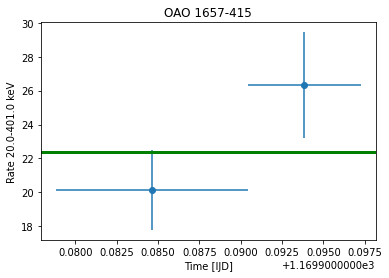

In [9]:
image_product = oda_api.plot_tools.OdaLightCurve(data_collection)
img_fn = image_product.get_image_for_gallery( in_source_name=source_name)

fits_file_fn = image_product.write_fits(source_name=source_name)[0]
                                             
d = disp.post_data_product_to_gallery(token=token,
                                           RA=RA, DEC=DEC, e1_kev=E1_keV, e2_kev=E2_keV,
                                           product_title=source_name,
                                           gallery_image_path=img_fn,
                                           fits_file_path=[fits_file_fn],
                                           src_name=source_name,
                                           instrument='jemx1',
                                           product_type='jemx_lc',
                                           produced_by=notebook_link,
                                           observation_id=source_name + '_' + tstart + '_' + tstop
                                          )